In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import json
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
testing = True
    
# The base directory is one level up
base = '..'
settings_filepath = (
    '../settings-grch38-dnase-12kb-testing.json'
    if testing
    else '../settings-grch38-dnase-12kb.json'
)
cnn_search_filepath = '../cnn-search.json'
optimizer_search_filepath = '../optimizer-search.json'

with open(settings_filepath, "r") as f:
    settings = json.load(f)

with open(cnn_search_filepath, "r") as f:
    cnn_search = json.load(f)

with open(optimizer_search_filepath, "r") as f:
    optimizer_search = json.load(f)
    
from find import find

datasets_filepath = find(settings, base=base, clear=True, verbose=True, strict=True)

# Comment out or remove the following line. It's only used for testing
datasets_filepath = '../datasets-grch38-dnase-testing.json' if testing else datasets_filepath
with open(datasets_filepath, "r") as f:
    datasets = json.load(f)
    dataset_ids = list(datasets.keys())

Search for experiments... done!
Found 57 human DNase-seq experiments
Download metadata... done!
Removed 40 experiments due to auditing errors
Found 12 experiments comprising 12 datasets
Saved dataset accessions to ../datasets-grch38-dnase-2019-02-26-strict.json


In [5]:
from jobs import jobs

jobs(
    os.path.relpath(optimizer_search_filepath, base),
    os.path.relpath(settings_filepath, base),
    dataset='merged',
    base=base,
    clear=False,
    verbose=False
)


Skipped creating 72 definition files as they already exists
Created slurm file for training 72 neural networks


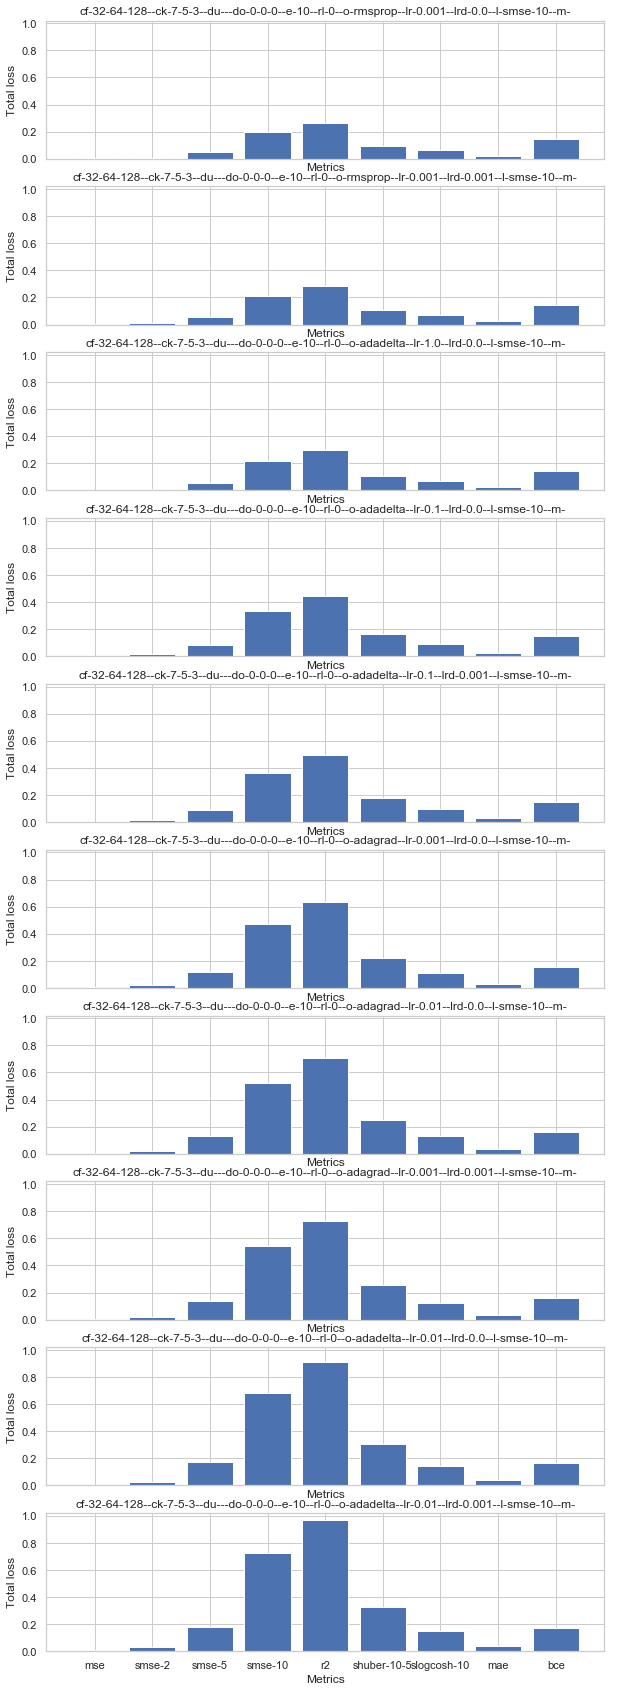

In [7]:
from compare import compare

loss = compare(
    'definitions-optimizer-search.json',
    dataset_name='merged',
    base=base,
    clear=False,
    verbose=False,
    silent=False,
    remove_common_prefix_from_df=True,
)

In [5]:
import qgrid

qgw = qgrid.show_grid(loss)
qgw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [ ]:
from IPython.core.display import Image, display

for model in qgw.get_selected_df().iterrows():
    print(model[0])
    display(Image(os.path.join(base, 'models', 'cf-{}---predictions-{}.png'.format(model[0], dataset))))